In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score

Loading the dataset

In [3]:
df=pd.read_csv('HousingData.csv')

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Feature variables and target

In [5]:
# Removing rows with missing values
df=df.dropna()
# Features and target

X=df.drop("MEDV",axis=1)

y=df["MEDV"]

# Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


Linear Regression Model

In [8]:
# Random Forest Regressor
rand_model=RandomForestRegressor(n_estimators=100, random_state=42)
rand_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [9]:
#XGB Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

Predicting and Evaluating

In [11]:
# Predictions
y_pred_rand=rand_model.predict(X_test)
y_pred_xgb=xgb_model.predict(X_test)

#Evaluating

print("Random Forest:")

print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rand))
print("R² Score:", r2_score(y_test, y_pred_rand))

print("\nXGBoost:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_xgb))
print("R² Score:", r2_score(y_test, y_pred_xgb))

Random Forest:
Mean Squared Error: 28.618182303797468
R² Score: 0.6607066367285603

XGBoost:
Mean Squared Error: 29.173673695965544
R² Score: 0.6541208046615099


Visualization 

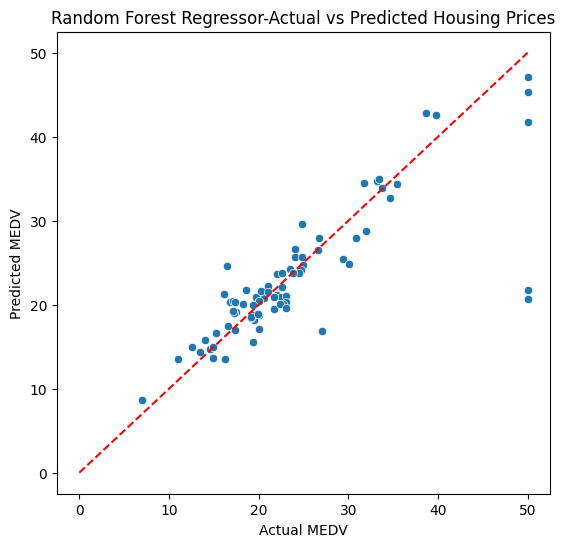

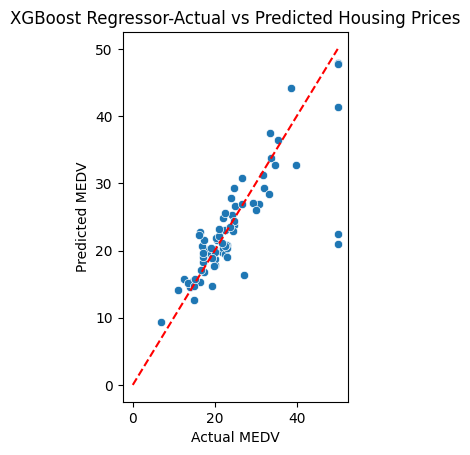

In [12]:
# Visualizing
plt.figure(figsize=(14,6))

# Random Forest Regressor

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_rand)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Random Forest Regressor-Actual vs Predicted Housing Prices")
plt.plot([0, 50], [0, 50], '--r')
plt.show()

# XGB Regressor

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("XGBoost Regressor-Actual vs Predicted Housing Prices")
plt.plot([0, 50], [0, 50], '--r')
plt.show()